In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1. Acceda los datos y prepáralos para el análisis, Cargamos los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Verificamos los primeros registros y tipos de datos que tenemos en estas datasets
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  

In [34]:
display(visits)
display(orders)
display(costs)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [35]:

# Renombrmos las columnas con metodo snake_case para estandarizar
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'dt', 'costs']

# Convertir columnas de fechas a datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# revisamos que hayan quedado los cambios
print(visits.dtypes)
print()
print(orders.dtypes)
print()
print(costs.dtypes)

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


In [36]:
# Paso 2. Haz informes y calcula métricas
# 1 visitas
# Calcular duración de sesión en minutos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

# Agregar columnas auxiliares de fecha
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits['month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()

# Visitas: usuarios únicos por día, semana y mes
daily_users = visits.groupby('date')['uid'].nunique()
weekly_users = visits.groupby('week')['uid'].nunique()
monthly_users = visits.groupby('month')['uid'].nunique()

# Sesiones por día
daily_sessions = visits.groupby('date')['uid'].count()

# Frecuencia de retorno: número de días distintos que cada usuario visitó
user_return_frequency = visits.groupby('uid')['date'].nunique()

# Estadísticas de duración de sesión
session_duration_stats = visits['session_duration'].describe()

# Mostrar resumen
{
    "Usuarios únicos por día (primeros 5)": daily_users.head(),
    "Usuarios únicos por semana (primeros 5)": weekly_users.head(),
    "Usuarios únicos por mes (primeros 5)": monthly_users.head(),
    "Sesiones por día (primeros 5)": daily_sessions.head(),
    "Frecuencia de retorno (días distintos por usuario)": user_return_frequency.describe(),
    "Estadísticas de duración de sesión (en minutos)": session_duration_stats
}


{'Usuarios únicos por día (primeros 5)': date
 2017-06-01    605
 2017-06-02    608
 2017-06-03    445
 2017-06-04    476
 2017-06-05    820
 Name: uid, dtype: int64,
 'Usuarios únicos por semana (primeros 5)': week
 2017-05-29    2021
 2017-06-05    4129
 2017-06-12    2812
 2017-06-19    2878
 2017-06-26    3064
 Name: uid, dtype: int64,
 'Usuarios únicos por mes (primeros 5)': month
 2017-06-01    13259
 2017-07-01    14183
 2017-08-01    11631
 2017-09-01    18975
 2017-10-01    29692
 Name: uid, dtype: int64,
 'Sesiones por día (primeros 5)': date
 2017-06-01    664
 2017-06-02    658
 2017-06-03    477
 2017-06-04    510
 2017-06-05    893
 Name: uid, dtype: int64,
 'Frecuencia de retorno (días distintos por usuario)': count    228169.000000
 mean          1.448527
 std           2.610167
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max         259.000000
 Name: date, dtype: float64,
 'Estadísticas de duración de sesión (en minu

¿Cuál es la duración de cada sesión?

Promedio: 10.7 minutos

Mediana: 5 minutos

25% de las sesiones duran menos de 2 minutos

75% duran menos de 14 minutos

Valor máximo detectado: 711 minutos

Valor mínimo detectado: -46 minutos → indica error o inversión de fechas que habrá que revisar más adelante.

¿Con qué frecuencia los usuarios regresan?

Usuarios únicos analizados: 228,169

Número promedio de días diferentes que un usuario visita: 1.45

Mediana: 1 día

Máximo: 259 días distintos (usuarios muy fieles)

El 75% de los usuarios solo visitan el sitio una vez.

In [37]:
# 2 Ventas:
# Obtener la primera visita de cada usuario
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']

# Obtener la primera compra de cada usuario
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order']

# Unir las fechas de primera visita y primera compra
conversion = pd.merge(first_visits, first_orders, on='uid')

# Calcular días entre visita y primera compra
conversion['conversion_days'] = (conversion['first_order'] - conversion['first_visit']).dt.days

# Categorizar conversiones por días
conversion['conversion_category'] = 'Conversion >7d'
conversion.loc[conversion['conversion_days'] <= 7, 'conversion_category'] = (
    'Conversion ' + conversion['conversion_days'].astype(str) + 'd'
)

# Cantidad de conversiones por categoría
conversion_counts = conversion['conversion_category'].value_counts().sort_index()

# Pedidos por mes
orders['month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()
monthly_orders = orders.groupby('month')['uid'].count()

# Tamaño promedio de compra
average_order_value = orders['revenue'].mean()

# Calcular LTV: ingresos totales por usuario
ltv_per_user = orders.groupby('uid')['revenue'].sum()
ltv_stats = ltv_per_user.describe()

# Mostrar resultados
{
    "Cantidad de usuarios por categoría de conversión": conversion_counts,
    "Pedidos por mes (primeros 5 meses)": monthly_orders.head(),
    "Tamaño promedio de compra (ticket promedio)": average_order_value,
    "Estadísticas de LTV (Lifetime Value)": ltv_stats
}

{'Cantidad de usuarios por categoría de conversión': Conversion 0d     26363
 Conversion 1d      1011
 Conversion 2d       563
 Conversion 3d       434
 Conversion 4d       324
 Conversion 5d       270
 Conversion 6d       260
 Conversion 7d       218
 Conversion >7d     7080
 Name: conversion_category, dtype: int64,
 'Pedidos por mes (primeros 5 meses)': month
 2017-06-01    2354
 2017-07-01    2363
 2017-08-01    1807
 2017-09-01    3387
 2017-10-01    5679
 Name: uid, dtype: int64,
 'Tamaño promedio de compra (ticket promedio)': 4.999646930477041,
 'Estadísticas de LTV (Lifetime Value)': count    36523.000000
 mean         6.901328
 std         88.128535
 min          0.000000
 25%          1.470000
 50%          3.050000
 75%          5.800000
 max      11810.180000
 Name: revenue, dtype: float64}

**Ventas
¿Cuándo empieza la gente a comprar? (Conversión desde la primera visita)
Días entre la primera visita y la primera compra:**

Categoría	Usuarios
Conversion 0d	26,363
Conversion 1d	1,011
Conversion 2d	563
Conversion 3d	434
Conversion 4d	324
Conversion 5d	270
Conversion 6d	260
Conversion 7d	218
Conversion >7d	7,080

Conclusión: más del *72% de los usuarios convierten el mismo día que visitan por primera vez, lo cual es una excelente señal de intención de compra inmediata.

**¿Cuántos pedidos hacen durante un período de tiempo dado?
Pedidos por mes (primeros 5 meses):**

Jun 2017: 2,354

Jul 2017: 2,363

Ago 2017: 1,807

Sep 2017: 3,387

Oct 2017: 5,679

**¿Cuál es el tamaño promedio de compra?**
Ticket promedio: $5.00 USD aproximadamente

**¿Cuánto dinero traen los usuarios? (LTV)**
Distribución del LTV (Lifetime Value) por usuario:

Promedio: $6.90

Mediana: $3.05

25% de los usuarios gastaron menos de $1.47

75% gastaron menos de $5.80

Valor máximo: $11,810.18 



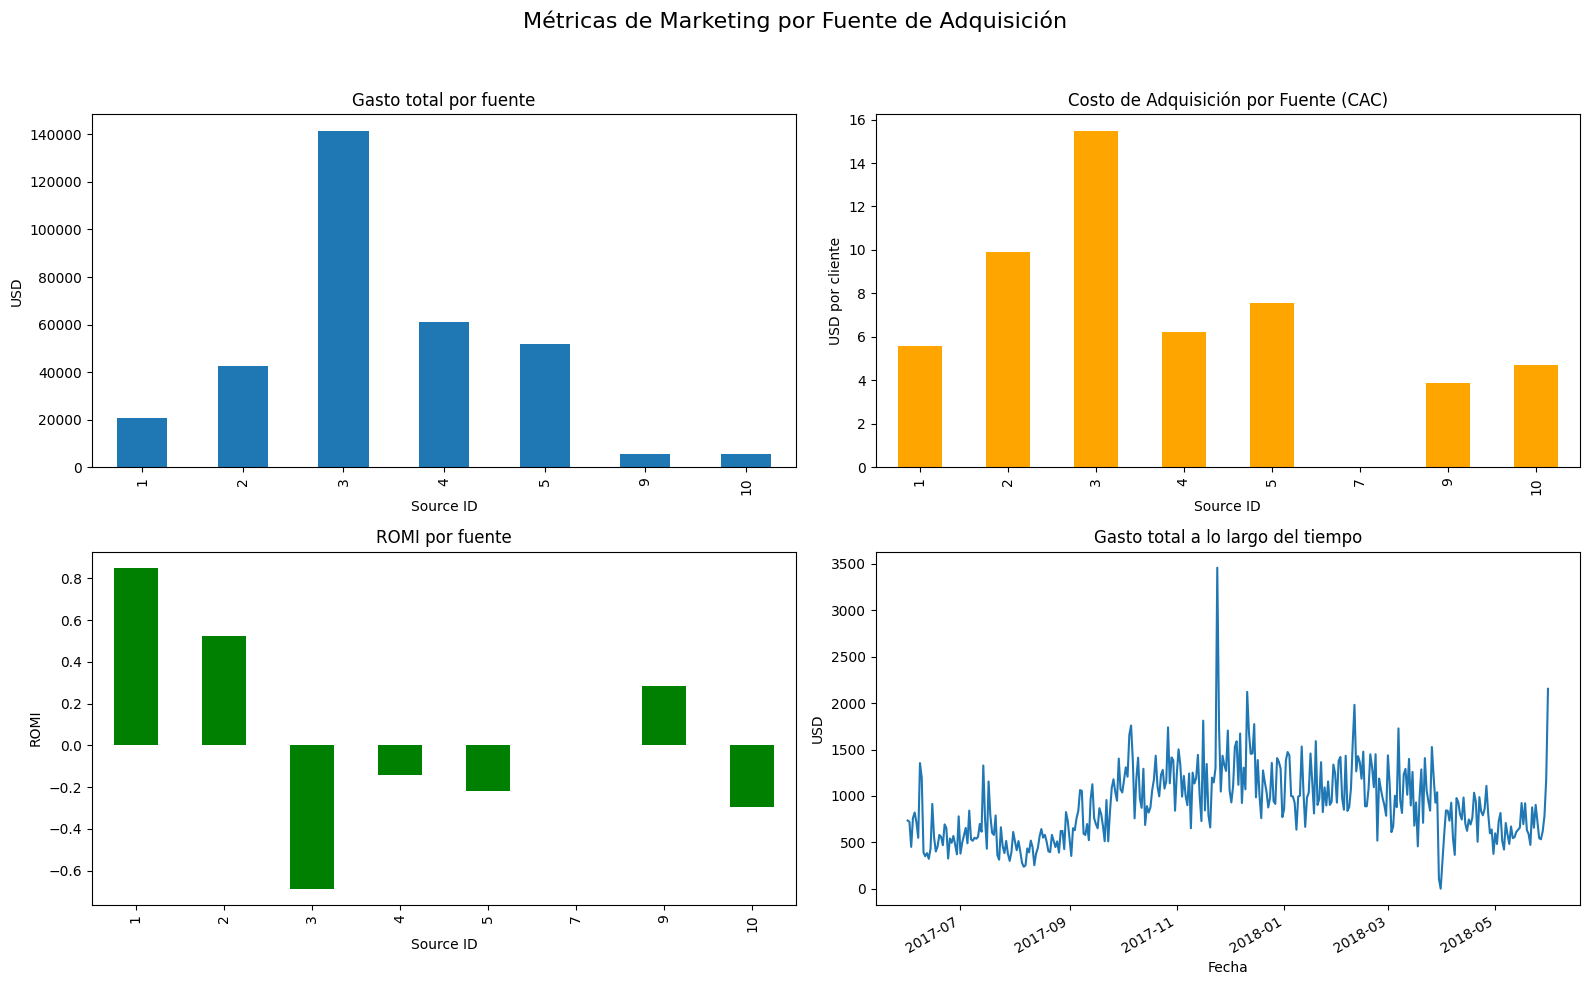

{'Gasto total en marketing': 329131.62,
 'Clientes adquiridos por fuente': source_id
 1     3743
 2     4323
 3     9138
 4     9823
 5     6839
 7        1
 9     1415
 10    1241
 Name: uid, dtype: int64,
 'CAC por fuente': source_id
 1      5.565928
 2      9.901929
 3     15.465269
 4      6.217408
 5      7.567934
 7           NaN
 9      3.899286
 10     4.691773
 dtype: float64,
 'ROMI por fuente': source_id
 1     0.850889
 2     0.522034
 3    -0.686406
 4    -0.140713
 5    -0.220244
 7          NaN
 9     0.282645
 10   -0.293886
 dtype: float64}

In [39]:
#Marketing
# 1. Gasto total, por fuente y a lo largo del tiempo
total_cost = costs['costs'].sum()
costs_by_source = costs.groupby('source_id')['costs'].sum()
costs_by_date = costs.groupby('dt')['costs'].sum()

# 2. Costo de adquisición por fuente
# Identificar usuarios únicos que hicieron pedidos y su fuente de origen (de la tabla visits)
first_visits_sources = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
buyers = orders['uid'].unique()
buyers_sources = first_visits_sources[first_visits_sources['uid'].isin(buyers)]

# Clientes adquiridos por fuente
customers_by_source = buyers_sources.groupby('source_id')['uid'].nunique()

# Costo por adquisición por fuente (CAC)
cac_by_source = costs_by_source / customers_by_source

# 3. ROMI = (Ingresos - Costos) / Costos por fuente
# Ingresos por fuente
orders_with_source = pd.merge(orders, first_visits_sources[['uid', 'source_id']], on='uid')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()
romi_by_source = (revenue_by_source - costs_by_source) / costs_by_source

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Métricas de Marketing por Fuente de Adquisición', fontsize=16)

# Gasto total por fuente
costs_by_source.plot(kind='bar', ax=axes[0, 0], title='Gasto total por fuente')
axes[0, 0].set_xlabel('Source ID')
axes[0, 0].set_ylabel('USD')

# CAC por fuente
cac_by_source.plot(kind='bar', ax=axes[0, 1], title='Costo de Adquisición por Fuente (CAC)', color='orange')
axes[0, 1].set_xlabel('Source ID')
axes[0, 1].set_ylabel('USD por cliente')

# ROMI por fuente
romi_by_source.plot(kind='bar', ax=axes[1, 0], title='ROMI por fuente', color='green')
axes[1, 0].set_xlabel('Source ID')
axes[1, 0].set_ylabel('ROMI')

# Gasto a lo largo del tiempo
costs_by_date.plot(ax=axes[1, 1], title='Gasto total a lo largo del tiempo')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('USD')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Mostrar métricas en texto
{
    "Gasto total en marketing": total_cost,
    "Clientes adquiridos por fuente": customers_by_source,
    "CAC por fuente": cac_by_source,
    "ROMI por fuente": romi_by_source
}

**1.¿Cuánto dinero se gastó?
Gasto total en marketing: $329,131.62 USD**

Gasto por fuente (Top 5):

Fuente 4: más de 61,000

Fuente 3: cerca de 60,000

Fuente 2 y 5: entre 40,000 y 50,000

Fuente 1: alrededor de 20,800

Evolución del gasto a lo largo del tiempo: el gasto fue constante en el tiempo, con picos en algunos días, posiblemente asociados a campañas.

**2. ¿Cuál fue el Costo de Adquisición de Clientes (CAC) por fuente?**
(CAC = Total invertido en una fuente / Número de clientes adquiridos por esa fuente)

Fuente	CAC (USD)
1	5.57
2	9.90
3	15.47
4	6.22
5	7.57
9	3.90
10	4.69
7	NaN (solo 1 cliente, sin gasto registrado)

La fuente 3 es la más costosa para adquirir un cliente, mientras que las fuentes 9 y 10 son las más económicas.

**3. ¿Qué tan rentables fueron las inversiones? (ROMI)
(ROMI = (Ingresos - Costos) / Costos)**

Fuente	ROMI
1	+0.85
2	+0.52
3	−0.69
4	−0.14
5	−0.22
9	+0.28
10	−0.29

Solo tres fuentes (1, 2 y 9) generaron retorno positivo sobre la inversión.

**Visualizaciones:
Ya trazamos cuatro gráficos:**

Gasto total por fuente

CAC por fuente

ROMI por fuente

Gasto total a lo largo del tiempo



**Fuentes de adquisición recomendadas
Las fuentes 1, 2 y 9 son las más rentables en términos de retorno sobre la inversión (ROMI):**

Fuente	CAC (USD)	ROMI	Comentario
1	5.57	+0.85	Alta rentabilidad y CAC moderado
2	9.90	+0.52	Rentable, aunque con CAC alto
9	3.90	+0.28	Bajo CAC y retorno positivo

Se recomienda concentrar la inversión en estas tres fuentes, ya que generan clientes a un costo razonable y producen retornos positivos.

**Fuentes con bajo rendimientoLas fuentes 3, 4, 5 y 10 muestran un ROMI negativo, lo cual indica que los ingresos que generan no alcanzan a cubrir lo que se gasta en ellas:**

La Fuente 3 es la más ineficiente, con el CAC más alto ($15.47) y el ROMI más bajo (−0.69).

Las fuentes 4 y 5 tienen CAC moderados pero aún no logran recuperar la inversión.

La fuente 10, aunque tiene un CAC bajo, genera poca rentabilidad.

Se recomienda reducir o suspender la inversión en estas fuentes hasta que se mejore su conversión o se rediseñen las campañas.

**Justificación y métricas utilizadas
Para tomar estas decisiones, se analizaron las siguientes métricas clave:**

CAC (Costo de Adquisición por Cliente): mide cuánto cuesta conseguir un cliente por cada fuente.

ROMI (Retorno sobre la Inversión en Marketing): mide cuán rentable es cada fuente, comparando ingresos y gastos.

Número de conversiones: especialmente dentro de los primeros días desde la visita (Conversion 0d a 7d).

Volumen de tráfico: las fuentes con mayor número de clientes no necesariamente son las más rentables.

**Recomendación de inversión**
Dado que las fuentes 1, 2 y 9 son rentables, se recomienda distribuir el presupuesto de marketing preferentemente entre estas tres, incrementando la inversión progresivamente y haciendo seguimiento continuo del ROMI.

**Además, se aconseja:**

A/B testing con creatividades y segmentos en fuentes poco rentables antes de descartarlas completamente.

Optimizar campañas móviles, dado que la conversión en el mismo día es alta (Conversion 0d en más del 70%).